# Predict the eCommerce price

## 1. Exploratory data analysis

### import libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

/Users/lamdoan/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/lamdoan/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### import the data 

In [7]:
df_raw = pd.read_csv('Train.csv',parse_dates=['Date'])

In [8]:
# check head and the info

In [9]:
df_raw.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0


In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product        2452 non-null   object        
 1   Product_Brand  2452 non-null   object        
 2   Item_Category  2452 non-null   object        
 3   Subcategory_1  2452 non-null   object        
 4   Subcategory_2  2452 non-null   object        
 5   Item_Rating    2452 non-null   float64       
 6   Date           2452 non-null   datetime64[ns]
 7   Selling_Price  2452 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 153.4+ KB


In [11]:
df_raw.nunique()

Product          2452
Product_Brand    1010
Item_Category      75
Subcategory_1     130
Subcategory_2     336
Item_Rating        41
Date              483
Selling_Price    1095
dtype: int64

### check if there is any null cell

In [12]:
df_raw.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
Selling_Price    0
dtype: int64

### check Selling_price distribution

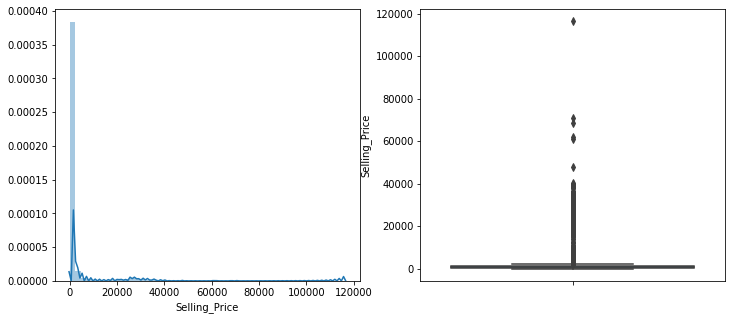

In [13]:
plt.figure(figsize=(12,5))
plt.tight_layout()
plt.subplot(1,2,1)
sns.distplot(df_raw['Selling_Price'])
plt.subplot(1,2,2)
sns.boxplot(y=df_raw['Selling_Price'])


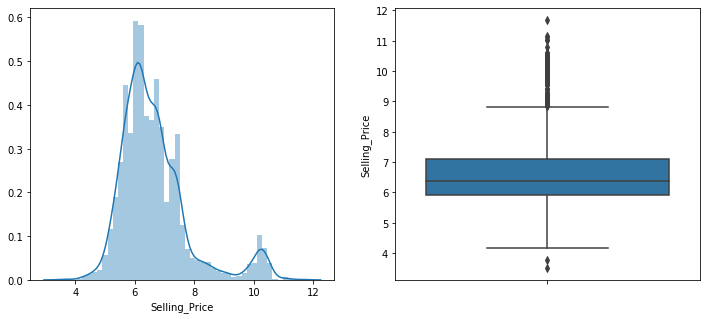

In [14]:
# The price distribution is higly skewed. Change it to log scale
df_raw['Selling_Price']=np.log1p(df_raw['Selling_Price'])

# plot again
plt.figure(figsize=(12,5))
plt.tight_layout()
plt.subplot(1,2,1)
sns.distplot(df_raw['Selling_Price'])
plt.subplot(1,2,2)
sns.boxplot(y=df_raw['Selling_Price'])

## 2. Featuring: create new features for training the model

### From the Date column

In [15]:
# make a copy of the data
df_fea = df_raw.copy()
df_fea.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,5.676754
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,6.800170
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,6.675823
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,6.731018
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,6.154858


In [16]:
# extract month
df_fea['Month'] = pd.to_datetime(df_fea['Date']).dt.month
# extract quater
df_fea['Quarter'] = pd.to_datetime(df_fea['Date']).dt.quarter
# extract Week
df_fea['Week'] = pd.to_datetime(df_fea['Date']).dt.week
# extract Day of week
df_fea['DayofWeek'] = pd.to_datetime(df_fea['Date']).dt.dayofweek
# extract Day of week
df_fea['DayofYear'] = pd.to_datetime(df_fea['Date']).dt.dayofyear
df_fea.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Month,Quarter,Week,DayofWeek,DayofYear
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,5.676754,2,1,5,4,34
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,6.800170,7,3,27,2,182
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,6.675823,1,1,2,5,12
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,6.731018,12,4,50,4,346
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,6.154858,12,4,50,3,346


### average Rating at each Product, Item, and Category

In [17]:
df_fea['Product_averg_Rating'] = df_fea.groupby('Product')['Item_Rating'].transform('mean')
df_fea['Product_Brand_averg_Rating'] = df_fea.groupby('Product_Brand')['Item_Rating'].transform('mean')
df_fea['Subcategory_1_averg_Rating'] = df_fea.groupby('Subcategory_1')['Item_Rating'].transform('mean')
df_fea['Subcategory_2_averg_Rating'] = df_fea.groupby('Subcategory_2')['Item_Rating'].transform('mean')
df_fea.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Month,Quarter,Week,DayofWeek,DayofYear,Product_averg_Rating,Product_Brand_averg_Rating,Subcategory_1_averg_Rating,Subcategory_2_averg_Rating
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,5.676754,2,1,5,4,34,4.3,4.300000,3.744444,3.853846
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,6.800170,7,3,27,2,182,3.1,3.109593,3.134034,3.222472
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,6.675823,1,1,2,5,12,3.5,2.650000,3.220000,2.742857
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,6.731018,12,4,50,4,346,4.0,3.109593,3.550000,4.000000
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,6.154858,12,4,50,3,346,4.3,3.109593,3.011494,3.008197


### number of Item and Subcategory at each Product

In [18]:
df_fea['Product_unique_ItemCategory'] = df_fea.groupby('Product')['Item_Category'].transform('nunique')
df_fea['Product_unique_Subcategory_1'] = df_fea.groupby('Product')['Subcategory_1'].transform('nunique')
df_fea['Product_unique_Subcategory_2'] = df_fea.groupby('Product')['Subcategory_2'].transform('nunique')
df_fea.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Month,Quarter,Week,DayofWeek,DayofYear,Product_averg_Rating,Product_Brand_averg_Rating,Subcategory_1_averg_Rating,Subcategory_2_averg_Rating,Product_unique_ItemCategory,Product_unique_Subcategory_1,Product_unique_Subcategory_2
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,5.676754,2,1,5,4,34,4.3,4.300000,3.744444,3.853846,1,1,1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,6.800170,7,3,27,2,182,3.1,3.109593,3.134034,3.222472,1,1,1
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,6.675823,1,1,2,5,12,3.5,2.650000,3.220000,2.742857,1,1,1
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,6.731018,12,4,50,4,346,4.0,3.109593,3.550000,4.000000,1,1,1
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,6.154858,12,4,50,3,346,4.3,3.109593,3.011494,3.008197,1,1,1


### number of Item and Subcategory at each Product_Brand

In [19]:
df_fea['Product_Brand_unique_ItemCategory'] = df_fea.groupby('Product_Brand')['Item_Category'].transform('nunique')
df_fea['Product_Brand_unique_Subcategory_1'] = df_fea.groupby('Product_Brand')['Subcategory_1'].transform('nunique')
df_fea['Product_Brand_unique_Subcategory_2'] = df_fea.groupby('Product_Brand')['Subcategory_2'].transform('nunique')
df_fea.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Month,Quarter,...,Product_averg_Rating,Product_Brand_averg_Rating,Subcategory_1_averg_Rating,Subcategory_2_averg_Rating,Product_unique_ItemCategory,Product_unique_Subcategory_1,Product_unique_Subcategory_2,Product_Brand_unique_ItemCategory,Product_Brand_unique_Subcategory_1,Product_Brand_unique_Subcategory_2
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,5.676754,2,1,...,4.3,4.300000,3.744444,3.853846,1,1,1,1,1,1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,6.800170,7,3,...,3.1,3.109593,3.134034,3.222472,1,1,1,13,29,100
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,6.675823,1,1,...,3.5,2.650000,3.220000,2.742857,1,1,1,1,1,1
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,6.731018,12,4,...,4.0,3.109593,3.550000,4.000000,1,1,1,13,29,100
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,6.154858,12,4,...,4.3,3.109593,3.011494,3.008197,1,1,1,13,29,100


### encode the Product_Brand, Item, and Subcategory

In [20]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

columns = ['Product_Brand','Item_Category','Subcategory_1','Subcategory_2']
for column in columns:
    df_fea[column] = encode.fit_transform(df_fea[column])

df_fea.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Month,Quarter,...,Product_averg_Rating,Product_Brand_averg_Rating,Subcategory_1_averg_Rating,Subcategory_2_averg_Rating,Product_unique_ItemCategory,Product_unique_Subcategory_1,Product_unique_Subcategory_2,Product_Brand_unique_ItemCategory,Product_Brand_unique_Subcategory_1,Product_Brand_unique_Subcategory_2
0,P-2610,862,7,10,137,4.3,2017-02-03,5.676754,2,1,...,4.3,4.300000,3.744444,3.853846,1,1,1,1,1,1
1,P-2453,670,10,127,329,3.1,2015-07-01,6.800170,7,3,...,3.1,3.109593,3.134034,3.222472,1,1,1,13,29,100
2,P-6802,280,29,112,101,3.5,2019-01-12,6.675823,1,1,...,3.5,2.650000,3.220000,2.742857,1,1,1,1,1,1
3,P-4452,670,8,37,134,4.0,2014-12-12,6.731018,12,4,...,4.0,3.109593,3.550000,4.000000,1,1,1,13,29,100
4,P-8454,670,10,80,296,4.3,2013-12-12,6.154858,12,4,...,4.3,3.109593,3.011494,3.008197,1,1,1,13,29,100


In [50]:
# Make a copy of the dataframe

df = df_fea.copy()

## 3. Machine Learning model

### Data spliting

In [52]:
df.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Month,Quarter,...,Product_averg_Rating,Product_Brand_averg_Rating,Subcategory_1_averg_Rating,Subcategory_2_averg_Rating,Product_unique_ItemCategory,Product_unique_Subcategory_1,Product_unique_Subcategory_2,Product_Brand_unique_ItemCategory,Product_Brand_unique_Subcategory_1,Product_Brand_unique_Subcategory_2
0,P-2610,862,7,10,137,4.3,2017-02-03,5.676754,2,1,...,4.3,4.300000,3.744444,3.853846,1,1,1,1,1,1
1,P-2453,670,10,127,329,3.1,2015-07-01,6.800170,7,3,...,3.1,3.109593,3.134034,3.222472,1,1,1,13,29,100
2,P-6802,280,29,112,101,3.5,2019-01-12,6.675823,1,1,...,3.5,2.650000,3.220000,2.742857,1,1,1,1,1,1
3,P-4452,670,8,37,134,4.0,2014-12-12,6.731018,12,4,...,4.0,3.109593,3.550000,4.000000,1,1,1,13,29,100
4,P-8454,670,10,80,296,4.3,2013-12-12,6.154858,12,4,...,4.3,3.109593,3.011494,3.008197,1,1,1,13,29,100


In [53]:
# drop the Product and Date columns
df = df.drop(['Product','Date'],axis=1)

In [54]:
X = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']

In [55]:
#X = df.drop(['Selling_Price','Product_Brand','Item_Category','Subcategory_1','Subcategory_2'],axis=1)
#y = df['Selling_Price']

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

### Select and train the model

In [57]:
# select the 
from xgboost import XGBRegressor

from xgboost import XGBRegressor
model = XGBRegressor(
 learning_rate =0.1,
 n_estimators=10000,
 max_depth=6,
 colsample_bytree=0.5,
 seed=100,
 eval_metric='rmse'
 )

# train the model
model.fit(X_train, y_train, eval_metric='rmse', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=100)

[0]	validation_0-rmse:5.61394
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:0.62969
Stopping. Best iteration:
[87]	validation_0-rmse:0.62824



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

### Predict and evaluate

In [58]:
pred = model.predict(X_test)

In [59]:
# mean_squared_error
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(pred)))

2774.403510315534

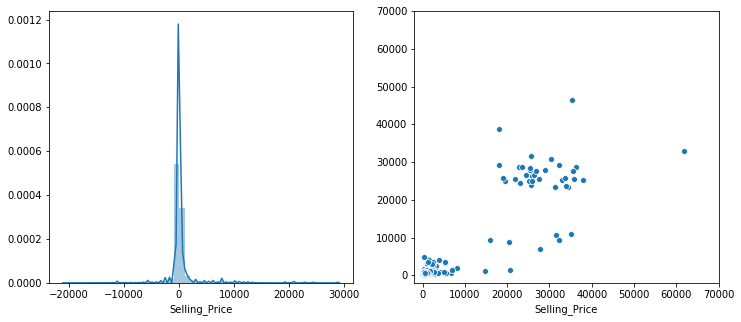

In [60]:
#  Plot the difference distibution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(np.expm1(y_test)-np.expm1(pred))
# scatter plot of the predicted value and the real value
plt.subplot(1,2,2)
plt.xlim(-2000,70000)
plt.ylim(-2000,70000)
sns.scatterplot(x=np.expm1(y_test),y=np.expm1(pred))

In [61]:
# Score
from sklearn.model_selection import cross_val_score
score = cross_val_score(X=X,y=y,estimator=model,scoring='neg_root_mean_squared_error',cv=5)

In [62]:
score

array([-0.73346114, -0.67833687, -0.69736947, -0.69593182, -0.69311335])

In [63]:
np.mean(score)

-0.6996425285274359

### Feature importances

In [97]:
importances = model.get_booster().get_score(importance_type='weight')
f_imp = pd.DataFrame.from_dict(importances, orient='index').reset_index()
f_imp.rename(columns={0: 'importances', 'index':'features'},inplace=True)
f_imp = f_imp.sort_values(['importances'], ascending=[False]).iloc[-30:]
f_imp

,features,importances
7,Product_Brand,1064
12,Item_Rating,540
3,Subcategory_2,533
4,Subcategory_2_averg_Rating,473
5,Item_Category,434
13,Product_Brand_averg_Rating,403
2,Subcategory_1,377
1,Subcategory_1_averg_Rating,373
15,Week,332
11,DayofWeek,317


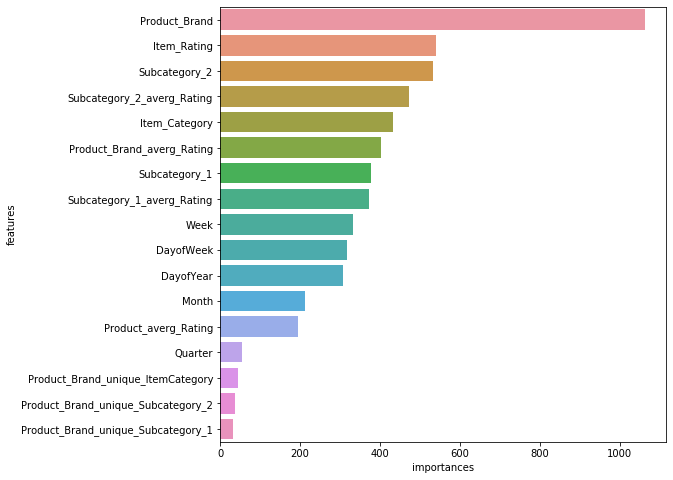

In [98]:
plt.figure(figsize=(8,8))
sns.barplot(y='features',x='importances',data=f_imp)